<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras. Classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](./data/mountain/art1131.jpg)|![](./data/forest/cdmc317.jpg)|

The problem is realively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be sometime that can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several differnet possible models.

In [1]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


94773248/94765736 [==============================] - 22s 0us/step


In [4]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

# Pre - Trained Model
<a id="p1"></a>

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)
```

The `include_top` parameter in `ResNet50` will remove the full connected layers from the ResNet model. The next step is to turn off the training of the ResNet layers. We want to use the learned parameters without updating them in future training passes. 

```python
for layer in resnet.layers:
    layer.trainable = False
```

Using the Keras functional API, we will need to additional additional full connected layers to our model. We we removed the top layers, we removed all preivous fully connected layers. In other words, we kept only the feature processing portions of our network. You can expert with additional layers beyond what's listed here. The `GlobalAveragePooling2D` layer functions as a really fancy flatten function by taking the average of each of the last convolutional layer outputs (which is two dimensional still). 

```python
x = res.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

## Load in Data

![skimage-logo](https://scikit-image.org/_static/img/logo.png)

Check out out [`skimage`](https://scikit-image.org/) for useful functions related to processing the images. In particular checkout the documentation for `skimage.io.imread_collection` and `skimage.transform.resize`.

In [5]:
from skimage.io import imread_collection
from skimage.transform import resize

## Instatiate Model

In [6]:
mountains = imread_collection('data/mountain/*.jpg')
forests = imread_collection('data/forest/*.jpg')

In [7]:
X = list(mountains) + list(forests)
y = [0] * len(mountains) + [1] * len(forests)

In [8]:
X = np.resize(np.array(X), (len(X), 256, 256, 3))
y = np.resize(np.array(y), (len(y), 1))

In [9]:
assert(len(X) == len(y))

In [10]:
for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit Model

In [13]:
model.fit(X, y,
          batch_size=10,
          validation_split=0.1,
          epochs=5)

Train on 631 samples, validate on 71 samples
Epoch 1/5
631/631 [==============================] - 40s 64ms/sample - loss: 0.3185 - accuracy: 0.9049 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2/5
631/631 [==============================] - 17s 28ms/sample - loss: 0.0903 - accuracy: 0.9667 - val_loss: 7.4042e-05 - val_accuracy: 1.0000
Epoch 3/5
631/631 [==============================] - 25s 40ms/sample - loss: 0.0851 - accuracy: 0.9604 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/5
631/631 [==============================] - 20s 32ms/sample - loss: 0.3465 - accuracy: 0.9176 - val_loss: 0.0496 - val_accuracy: 0.9859
Epoch 5/5
631/631 [==============================] - 17s 27ms/sample - loss: 0.1086 - accuracy: 0.9620 - val_loss: 0.0556 - val_accuracy: 0.9859


In [14]:
def forest_or_mountain(image):
    i = np.resize(np.array([image]), (1, 256, 256, 3)).astype('float32')

    pred = int(round(model.predict(i)[0,0]))
    
    if pred == 0:
        print("It's a mountain!")
    else:
        print("It's a forest!")

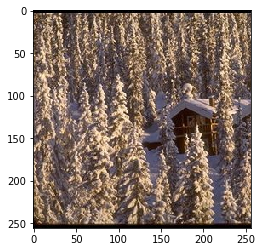

In [15]:
plt.imshow(forests[0])

In [16]:
forest_or_mountain(forests[0])

It's a forest!


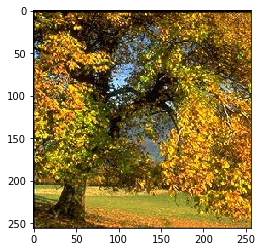

In [17]:
plt.imshow(forests[200])

In [18]:
forest_or_mountain(forests[200])

It's a forest!


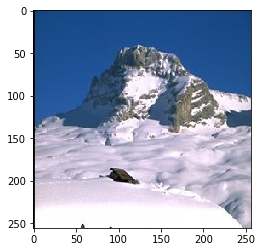

In [19]:
plt.imshow(mountains[0])

In [20]:
forest_or_mountain(mountains[0])

It's a mountain!


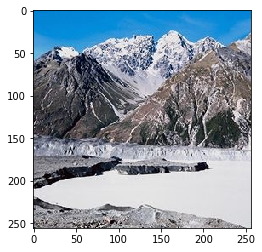

In [21]:
plt.imshow(mountains[200])

In [22]:
forest_or_mountain(mountains[200])

It's a mountain!


# Custom CNN Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation

In [37]:
custom_model = Sequential()

custom_model.add(Conv2D(32, (42, 42), input_shape=(256, 256, 3)))

custom_model.add(MaxPooling2D(pool_size=(5, 5)))

custom_model.add(Conv2D(64, (5, 5)))

custom_model.add(MaxPooling2D(pool_size=(3, 3)))

custom_model.add(Conv2D(64, (9, 9)))

custom_model.add(Flatten())

custom_model.add(Dense(64, activation='relu'))

custom_model.add(Dense(1, activation='sigmoid'))

In [38]:
# Compile Model
custom_model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

custom_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 215, 215, 32)      169376    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 39, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 64)          331840    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [39]:
# Fit Model
custom_model.fit(X, y,
                 batch_size=10,
                 validation_split=0.1,
                 epochs=10)

Train on 631 samples, validate on 71 samples
Epoch 1/10
631/631 [==============================] - 6s 9ms/sample - loss: 1094.5466 - accuracy: 0.5040 - val_loss: 0.6918 - val_accuracy: 1.0000
Epoch 2/10
631/631 [==============================] - 5s 8ms/sample - loss: 0.6928 - accuracy: 0.5357 - val_loss: 0.6994 - val_accuracy: 0.0000e+00
Epoch 3/10
631/631 [==============================] - 5s 8ms/sample - loss: 0.6914 - accuracy: 0.5927 - val_loss: 0.7077 - val_accuracy: 0.0000e+00
Epoch 4/10
631/631 [==============================] - 5s 8ms/sample - loss: 0.6897 - accuracy: 0.5927 - val_loss: 0.7170 - val_accuracy: 0.0000e+00
Epoch 5/10
631/631 [==============================] - 5s 8ms/sample - loss: 0.6881 - accuracy: 0.5927 - val_loss: 0.7294 - val_accuracy: 0.0000e+00
Epoch 6/10
631/631 [==============================] - 5s 8ms/sample - loss: 0.6866 - accuracy: 0.5927 - val_loss: 0.7390 - val_accuracy: 0.0000e+00
Epoch 7/10
631/631 [==============================] - 5s 9ms/sample 

In [32]:
def forest_or_mountain_custom(image):
    i = np.resize(np.array([image]), (1, 256, 256, 3)).astype('float32')

    pred = int(round(custom_model.predict(i)[0,0]))
    
    if pred == 0:
        print("It's a mountain!")
    else:
        print("It's a forest!")

In [33]:
forest_or_mountain_custom(mountains[200])

It's a mountain!


In [34]:
forest_or_mountain_custom(mountains[0])

It's a mountain!


In [35]:
forest_or_mountain_custom(forests[0])

It's a mountain!


In [36]:
forest_or_mountain_custom(forests[200])

It's a mountain!


# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language